In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv(r"C:\Users\sad\Downloads\Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [39]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [40]:
df.shape

(400, 5)

In [41]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [42]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [43]:
dummies = pd.get_dummies(df["Gender"],drop_first = True)
dummies

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [44]:
dfnew = df.drop(["User ID","Gender"] ,axis=1)
dfnew

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [45]:
dffinal = pd.concat([dfnew,dummies],axis =1)
dffinal

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [49]:
dffinal.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Male'], dtype='object')

In [56]:
X = dffinal.loc[:,["Age","EstimatedSalary","Male"]].values
print(f"The value of {X}")

The value of [[   19 19000     1]
 [   35 20000     1]
 [   26 43000     0]
 ...
 [   50 20000     0]
 [   36 33000     1]
 [   49 36000     0]]


In [57]:
y= dffinal.loc[:,["Purchased"]].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [63]:
Y=y.reshape(-1)
Y.shape

(400,)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state = 0,test_size = 0.25)


In [65]:
X_train.shape

(300, 3)

In [66]:
X_test.shape

(100, 3)

In [95]:
y_train.shape

(300,)

In [96]:
y_test.shape

(100,)

In [68]:
Y.shape

(400,)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [82]:
X_train

array([[ 0.58164944, -0.88670699, -0.98019606],
       [-0.60673761,  1.46173768,  1.02020406],
       [-0.01254409, -0.5677824 , -0.98019606],
       [-0.60673761,  1.89663484, -0.98019606],
       [ 1.37390747, -1.40858358, -0.98019606],
       [ 1.47293972,  0.99784738, -0.98019606],
       [ 0.08648817, -0.79972756,  1.02020406],
       [-0.01254409, -0.24885782,  1.02020406],
       [-0.21060859, -0.5677824 , -0.98019606],
       [-0.21060859, -0.19087153, -0.98019606],
       [-0.30964085, -1.29261101, -0.98019606],
       [-0.30964085, -0.5677824 ,  1.02020406],
       [ 0.38358493,  0.09905991,  1.02020406],
       [ 0.8787462 , -0.59677555, -0.98019606],
       [ 2.06713324, -1.17663843, -0.98019606],
       [ 1.07681071, -0.13288524,  1.02020406],
       [ 0.68068169,  1.78066227, -0.98019606],
       [-0.70576986,  0.56295021, -0.98019606],
       [ 0.77971394,  0.35999821, -0.98019606],
       [ 0.8787462 , -0.53878926, -0.98019606],
       [-1.20093113, -1.58254245,  1.020

In [83]:
X_test = scaler.fit_transform(X_test)

In [84]:
X_test

array([[-0.54748976,  0.5130727 ,  1.02020406],
       [ 0.15442019, -0.61825566, -0.98019606],
       [-0.10879604,  0.14615539,  1.02020406],
       [-0.54748976,  0.26846116, -0.98019606],
       [-0.10879604, -0.61825566, -0.98019606],
       [-0.81070599, -1.53554892,  1.02020406],
       [-0.45975102, -1.68843113, -0.98019606],
       [-0.0210573 ,  2.25592989,  1.02020406],
       [-1.60035469, -0.0678797 , -0.98019606],
       [ 0.94406888, -0.83229075,  1.02020406],
       [-0.54748976, -0.6488321 ,  1.02020406],
       [-0.72296725, -0.46537345, -0.98019606],
       [ 0.06668145, -0.46537345,  1.02020406],
       [ 0.24215893,  0.20730828,  1.02020406],
       [-1.4248772 ,  0.48249625,  1.02020406],
       [-0.37201227,  1.43036596, -0.98019606],
       [ 0.06668145,  0.20730828,  1.02020406],
       [-1.51261594,  0.45191981,  1.02020406],
       [ 1.64597884,  1.8278597 , -0.98019606],
       [-0.10879604, -1.47439603,  1.02020406],
       [-0.10879604, -0.70998498, -0.980

In [85]:
# 1st method
np.sqrt(X_train.shape[0])

17.320508075688775

In [92]:
# let us take value of 
k = 17

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [97]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [99]:
ypred = knn.predict(X_test)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [102]:
ypred.shape

(100,)

In [104]:
y_test.shape

(100,)

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [107]:
acc = accuracy_score(y_test,ypred)
acc

0.93

In [108]:
confusion_matrix(y_test,ypred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [112]:
#2nd Method
acc_list=[]
err_list=[]
for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    acc = accuracy_score(y_test,ypred)
    print(f" for k = {k},accuracy = {acc} ,error = {1-acc}")
    acc_list.append(acc)
    err_list.append(1-acc)
    
    

 for k = 1,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 2,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 3,accuracy = 0.92 ,error = 0.07999999999999996
 for k = 4,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 5,accuracy = 0.92 ,error = 0.07999999999999996
 for k = 6,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 7,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 8,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 9,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 10,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 11,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 12,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 13,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 14,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 15,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 16,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 17,accuracy = 0.93 ,error = 0.06999999999999995
 for k = 18,accuracy = 0.93 ,error = 0.0

<function matplotlib.pyplot.show(close=None, block=None)>

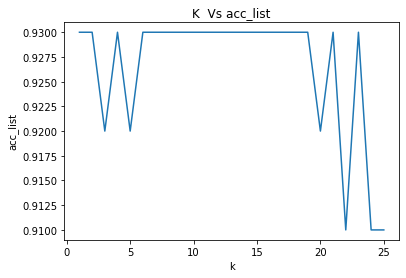

In [135]:
plt.plot(range(1,26),acc_list)
plt.title("K  Vs acc_list")
plt.xlabel("k")
plt.ylabel("acc_list")
plt.show

#### We can see from the plot of K vs acc_list, the accuracy is maximum for values of k between 5 to 19. We will take the value of k as 7 as its nearer and takes less time for searching data.

In [124]:
 knn = KNeighborsClassifier(n_neighbors=7)

In [125]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [126]:
ypred = knn.predict(X_test)

In [127]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [128]:
acc = accuracy_score(y_test,ypred)

In [129]:
acc

0.93

In [130]:
confusion_matrix(y_test,ypred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [136]:
y_test.shape

(100,)

In [138]:
ypred.shape

(100,)